In [15]:
from keras import datasets, models, layers, optimizers, losses, utils
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_img, train_lbl), (test_img, test_lbl) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train = train_img.reshape(60000, 28, 28, 1)
X_test = test_img.reshape(10000, 28, 28, 1)

In [5]:
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

In [6]:
y_train=utils.to_categorical(train_lbl, 10)
y_test=utils.to_categorical(test_lbl, 10)

In [7]:
input = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(16, 3, activation='relu', padding='same', strides=2)(input)
conv2 = layers.Conv2D(16, 3, activation='relu', padding='same', strides=2)(conv1)
conv3 = layers.Conv2D(16, 3, activation='relu', padding='same', strides=2)(conv2)
flat = layers.Flatten()(conv2)
out = layers.Dense(10, activation='softmax')(flat)


In [8]:
m2 = models.Model(input, out)
m2.compile(optimizer=optimizers.legacy.SGD(learning_rate=0.02), loss=losses.categorical_crossentropy)

In [9]:
m2.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 9s 24ms/step - loss: 2.3015 - val_loss: 2.3020
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 2.3010 - val_loss: 2.3021
Epoch 3/20
375/375 [==============================] - 8s 21ms/step - loss: 2.3010 - val_loss: 2.3020
Epoch 4/20
375/375 [==============================] - 7s 18ms/step - loss: 2.3010 - val_loss: 2.3020
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 2.3010 - val_loss: 2.3020
Epoch 6/20
375/375 [==============================] - 8s 22ms/step - loss: 2.3010 - val_loss: 2.3021
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 2.3009 - val_loss: 2.3021
Epoch 8/20
375/375 [==============================] - 8s 23ms/step - loss: 2.3010 - val_loss: 2.3019
Epoch 9/20
375/375 [==============================] - 7s 19ms/step - loss: 2.3009 - val_loss: 2.3019
Epoch 10/20
375/375 [==============================] - 7s 19ms/step - loss: 2.3009 - val_lo

313/313 [==============================] - 1s 3ms/step


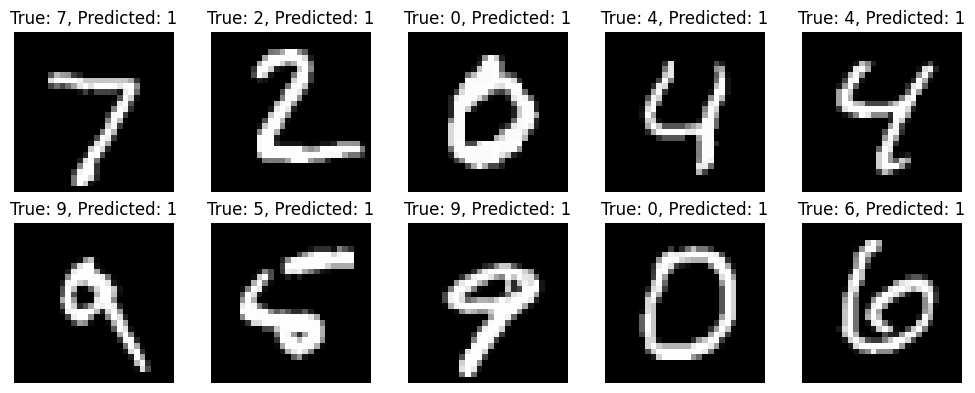

In [10]:
predictions = m2.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

error_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(10, 4))
for i, idx in enumerate(error_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[idx]}, Predicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
m2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 10330 (40.35 KB)
Trainable params: 10330 (40.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


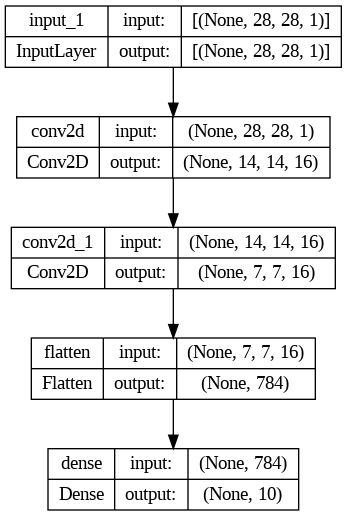

In [17]:
plot_model(m2, show_shapes=True)